In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

SMALL, MED, LARGE, LW = 18, 24, 30, 3
plt.rc('axes', titlesize=MED)    # fontsize of the axes title
plt.rc('axes', labelsize=MED)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL)   # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL)   # fontsize of the tick labels
plt.rc('legend', fontsize=MED)   # legend fontsize
plt.rc('font', size=LARGE)         # controls default text sizes

data = pd.read_csv('D:/tmp/gym/tr_500k.monitor.csv', header=1)

data.policy_kwargs.replace({"{'net_arch': [{'pi': [10, 10], 'vf': [10, 10]}], 'optimizer_class': <class 'torch.optim.rmsprop.RMSprop'>, 'optimizer_kwargs': {'alpha': 0.99, 'eps': 1e-05, 'weight_decay': 0}}": '(10, 10)',
       "{'net_arch': [{'pi': [10, 10, 10], 'vf': [10, 10, 10]}], 'optimizer_class': <class 'torch.optim.rmsprop.RMSprop'>, 'optimizer_kwargs': {'alpha': 0.99, 'eps': 1e-05, 'weight_decay': 0}}": '(10, 10, 10)',
       "{'net_arch': [{'pi': [50, 50], 'vf': [50, 50]}], 'optimizer_class': <class 'torch.optim.rmsprop.RMSprop'>, 'optimizer_kwargs': {'alpha': 0.99, 'eps': 1e-05, 'weight_decay': 0}}": '(50, 50)',
       "{'net_arch': [{'pi': [50, 50, 50], 'vf': [50, 50, 50]}], 'optimizer_class': <class 'torch.optim.rmsprop.RMSprop'>, 'optimizer_kwargs': {'alpha': 0.99, 'eps': 1e-05, 'weight_decay': 0}}": '(50, 50, 50)', 
       "{'net_arch': [{'pi': [100, 100, 100], 'vf': [100, 100, 100]}], 'optimizer_class': <class 'torch.optim.rmsprop.RMSprop'>, 'optimizer_kwargs': {'alpha': 0.99, 'eps': 1e-05, 'weight_decay': 0}}": '(100, 100, 100)',
       "{'net_arch': [{'pi': [50, 50, 50, 50], 'vf': [50, 50, 50, 50]}], 'optimizer_class': <class 'torch.optim.rmsprop.RMSprop'>, 'optimizer_kwargs': {'alpha': 0.99, 'eps': 1e-05, 'weight_decay': 0}}": '(50, 50, 50, 50)',
       "{'net_arch': [{'pi': [100, 100, 100, 100], 'vf': [100, 100, 100, 100]}], 'optimizer_class': <class 'torch.optim.rmsprop.RMSprop'>, 'optimizer_kwargs': {'alpha': 0.99, 'eps': 1e-05, 'weight_decay': 0}}": '(100, 100, 100, 100)'}, inplace=True)

data.policy_kwargs.unique

<bound method Series.unique of 0       (100, 100, 100)
1       (100, 100, 100)
2       (100, 100, 100)
3       (100, 100, 100)
4       (100, 100, 100)
             ...       
3350    (100, 100, 100)
3351    (100, 100, 100)
3352    (100, 100, 100)
3353    (100, 100, 100)
3354    (100, 100, 100)
Name: policy_kwargs, Length: 3355, dtype: object>

In [11]:
data['trial'] = data.step.cumsum() // 2_500_000
data

,r,l,t,step,player mass,player max mass,blobs,agars,policy_kwargs,trial
0,1.993000,5,1.376000,5,21.978340,21.993000,237,5,"(100, 100, 100)",0
1,303.213862,4144,20.778000,4144,294.436833,323.213862,1424,3,"(100, 100, 100)",0
2,2.775488,44,20.912001,44,22.699683,22.775488,217,5,"(100, 100, 100)",0
3,66.180226,674,23.117004,674,84.748522,86.180226,446,4,"(100, 100, 100)",0
4,32.211158,250,23.879004,250,52.158964,52.211158,313,4,"(100, 100, 100)",0
...,...,...,...,...,...,...,...,...,...,...
3350,11.508554,59,45048.691005,59,31.498051,31.508554,227,5,"(100, 100, 100)",2
3351,1.993000,6,45048.708004,6,21.971014,21.993000,234,5,"(100, 100, 100)",2
3352,10.659756,62,45048.885003,62,30.527163,30.659756,235,5,"(100, 100, 100)",2
3353,3.956369,24,45048.957004,24,23.940401,23.956369,245,5,"(100, 100, 100)",2


In [2]:
data.groupby(['policy_kwargs', 'learning_rate']).max()

KeyError: 'learning_rate'

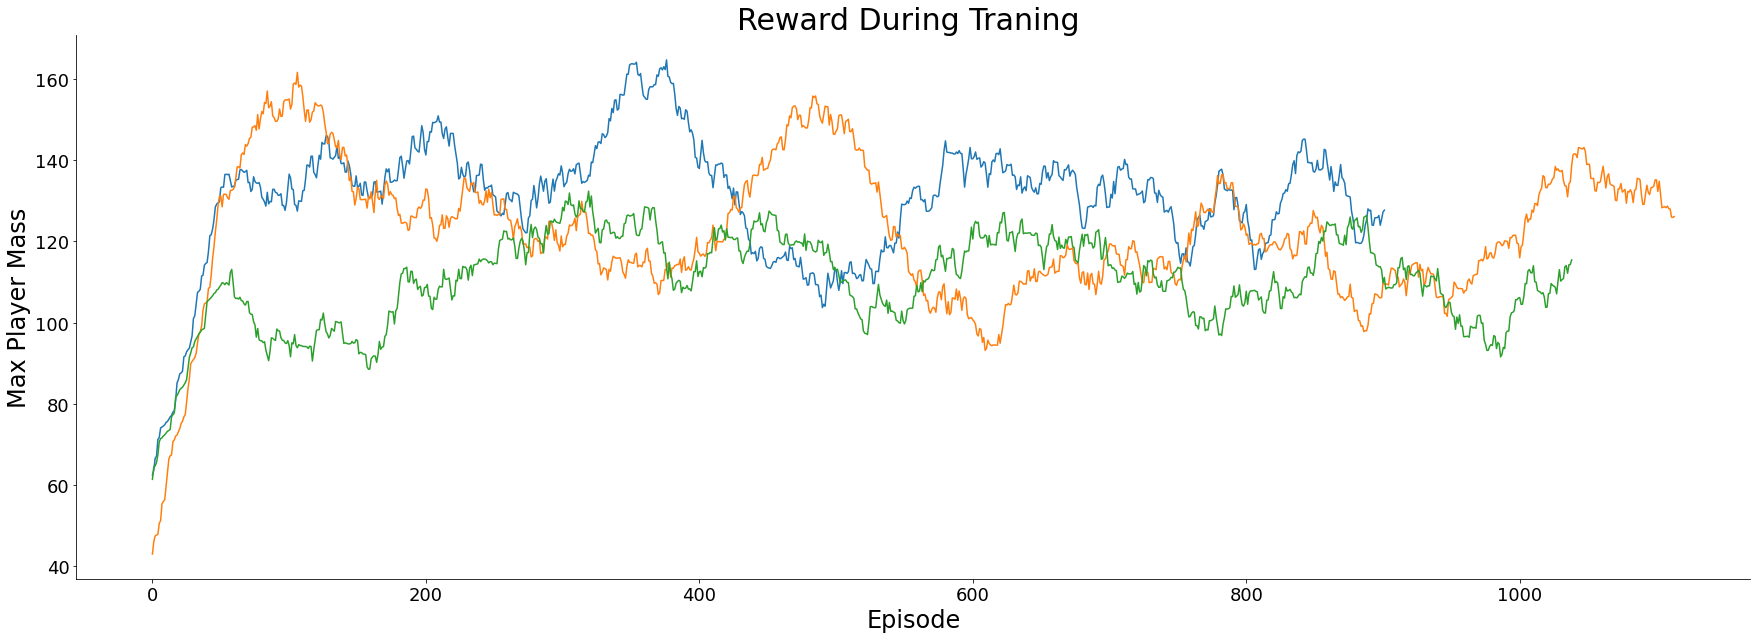

In [13]:
fig, ax = plt.subplots(figsize=(30, 10))

MAX_EP_REWARD = 242.07084202773154

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

reward = data.reset_index()['player max mass']
smooth_param = 100

#for d in data.policy_kwargs:
#    print(d)
#ax.plot(smooth(reward, smooth_param)[:-smooth_param])

for trial in range(3):
    ax.plot(smooth(data[data.trial == trial].reset_index()['player max mass'], smooth_param)[:-smooth_param])

# plt.axhline((MAX_EP_REWARD + 21.93) / 2)
# plt.axhline(MAX_EP_REWARD)
# plt.legend(frameon=False, fontsize=8)
        
ax.set_xlabel('Episode', fontsize=MED)
ax.set_ylabel('Max Player Mass', fontsize=MED)
ax.set_title('Max Mass During Training ', fontsize=LARGE)
sns.despine()
plt.savefig('reward.png', dpi=2*fig.dpi)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'learning_rate'

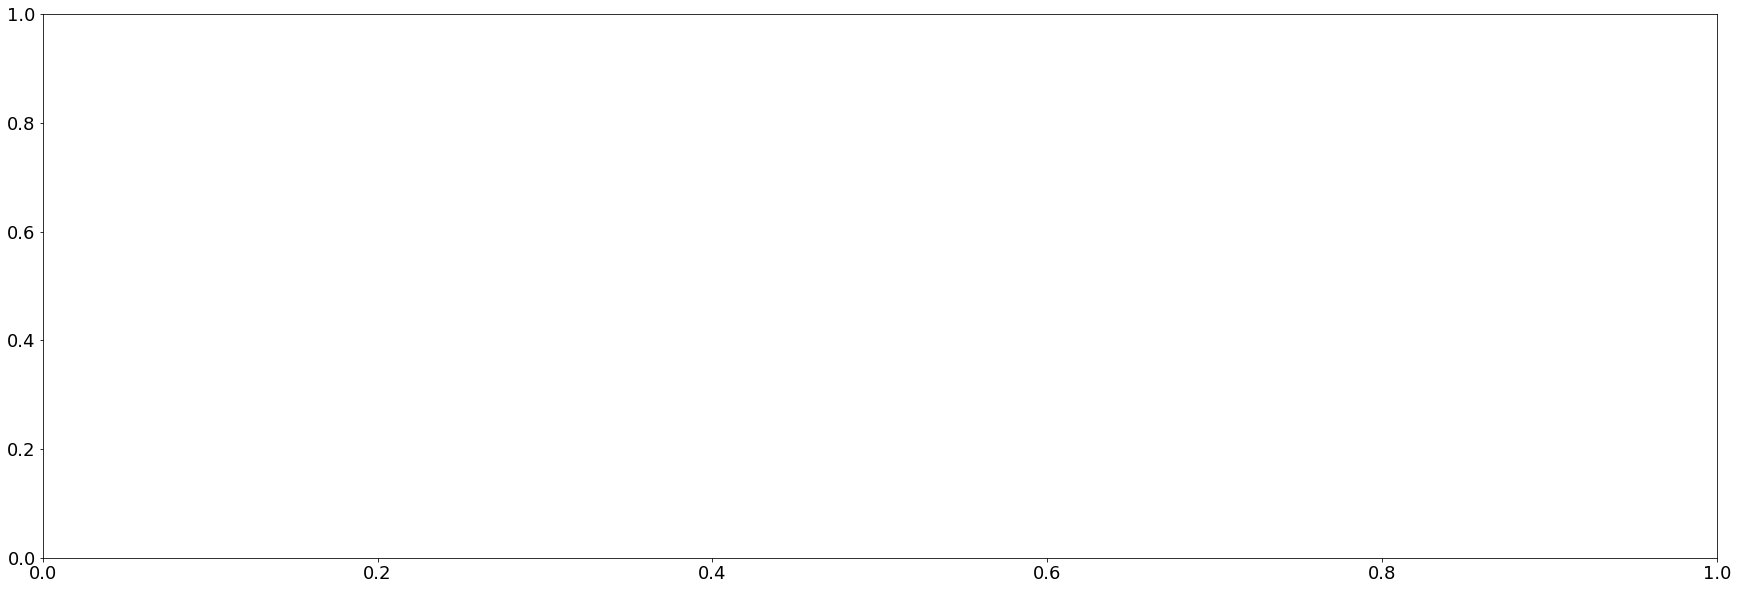

In [2]:
fig, ax = plt.subplots(figsize=(30, 10))

MAX_EP_REWARD = 242.07084202773154

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

for lr in data.learning_rate.unique():
    if lr < 0.001:
        for pkw in data.policy_kwargs.unique():
            reward = data[(data.learning_rate == lr) & (data.policy_kwargs == pkw)].reset_index()['player max mass']
            smooth_param = 10
            if lr <= 1e-6:
                ax.plot(smooth(reward, smooth_param)[:-smooth_param], label=f'lr: {lr}, net_arch: {pkw}', linestyle="--")
            else:
                ax.plot(smooth(reward, smooth_param)[:-smooth_param], label=f'lr: {lr}, net_arch: {pkw}')
        
plt.axhline((MAX_EP_REWARD + 21.93) / 2)
plt.axhline(MAX_EP_REWARD)
plt.legend(frameon=False, fontsize=8)

ax.set_xlabel('Episode', fontsize=MED)
ax.set_ylabel('Max Player Mass', fontsize=MED)
ax.set_title('Reward During Traning ', fontsize=LARGE)
sns.despine()
plt.savefig('reward.png', dpi=2*fig.dpi)
plt.show()

In [ ]:
net_arch [(30, 30, 30), (50, 50, 50), (100, 100, 100), (50, 50, 50, 50), (100, 100, 100, 100)]
lrs [1e-05, 1e-04, 1e-06, 1e-07]

NameError: name 'net_arch' is not defined

In [ ]:
def learning_rate(progress_remaining, start_lr=1e-03, final_lr=1e-07):
    return final_lr * (start_lr / final_lr) ** progress_remaining